In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install autoviml

     |████████████████████████████████| 125 kB 5.0 MB/s 
     |████████████████████████████████| 174 kB 33.4 MB/s 
     |████████████████████████████████| 125 kB 61.5 MB/s 
     |████████████████████████████████| 173.6 MB 7.6 kB/s 
     |████████████████████████████████| 76.1 MB 1.2 MB/s 
     |████████████████████████████████| 564 kB 67.1 MB/s 
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170298 sha256=919a094a4bad4d5248498fc6a7c1315bc03d4622e51817284660867ceb921db5
  Stored in directory: /root/.cache/pip/wheels/03/8b/d7/ad579fbef83c287215c0caab60fb0ae0f30c4d7ce5f580eade
Successfully built emoji
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [4]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import textblob
from textblob import TextBlob, Word
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [5]:
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version: 0.1.684. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.0.47.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


## User Defined Functions

In [6]:
def avg_word_len (sentence):
    words = sentence.split()
    avg_len = sum(len(word) for word in words)/len(words)
    return avg_len

def extract_ngrams(data, num):
    '''
    Function to generate n-grams from sentences
    '''
    n_grams = TextBlob(data).ngrams(num)
    return [ ' '.join(grams) for grams in n_grams]

In [7]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis/tweettrain.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis/tweettest.csv')

In [8]:
train.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


## 1. Feature Extraction
Creation of brand new features

#### 1.0 Character Count

In [9]:
# Creating a copy of train dataset for text analysis

df_train = train.copy()
df_train['char_count'] = df_train['tweet'].str.len()
df_train_sort_charcount = df_train.sort_values(by='char_count', ascending=False)
df_train_sort_charcount[['tweet', 'char_count']].head()

,tweet,char_count
19770,@user lmfao pathetic #soit #growup #funny #noonethere #iknowwhoitis ðððððððððððð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð±ð±ð¤ð¤ð±ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ðððððððâ¦,274
13459,awesom beautiful wonderfulððððððððððððð±ð±ð±ð±ð±ð±ðððððððððððððððððððððððððððððððððð»ð»ð»ð»,247
18433,@user rotterdam â¢ socafrenzy â¢ ðð¿ðð¿ðð¿ â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢ #dj #djlife â¦,203
31485,&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt; #äºå®®åä¹ bihday #to #you #æãå«ã¹ #33æ­³â¦,201
11283,@user st lucia â¢ socafrenzy ðð¿ðð¿ðð¿ â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢â¢ #dj #djlife â¦,199


In [10]:
df_train.head()

,id,label,tweet,char_count
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,102
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,86
4,5,0,factsguide: society now #motivation,39


#### 1.1 Word Count

In [11]:
df_train['word_count'] = df_train['tweet'].apply(lambda x: len(str(x).split(" ")))
df_train_sort_wordcount = df_train.sort_values(by='word_count', ascending=False)
df_train_sort_wordcount[['tweet','word_count']].head()


,tweet,word_count
1447,the greatest gift i ever had came from #god i call him #dad ó¾ó¾ó¾ #father's #day......!! ó¾ ó¾ â feeling proud,43
18895,â¢ h a p p y m o n d a y â¢ ð - f e l i z l u n e s - ð¤ #monday day @user,42
7123,@user good morning!!!!ðð. #me #smile #positivevibes #work #munichâ¦,40
23181,#thursdaythoughts from @user choose #everyday,39
30429,@user **** big announcement tonight at 8pm**** set your alarms don't miss it @user,38


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          31962 non-null  int64 
 1   label       31962 non-null  int64 
 2   tweet       31962 non-null  object
 3   char_count  31962 non-null  int64 
 4   word_count  31962 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


### 1.2 Count of Hash Tags

In [13]:
# Number of hashtags in a tweet

df_train['hashtags'] = df_train['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df_train_sort_hashtags = df_train.sort_values(by='hashtags', ascending=False)
df_train_sort_hashtags[['tweet', 'hashtags']].head()

,tweet,hashtags
24444,boy george #bihday #culture #club #music #a #radio #london #legend #studio #june #summer #popstar #live #night #dj #ibiza,16
13117,#boring saturday #summer #rain #candles #all_sunsets #selfies #holiday #sun #pay #girls #glasses #fun #instagood #baby #trees #b...,16
17009,"@user #spring #break #beach i #swim #gopro #sea #sun #plage #playa #mar #mer #me #magnÃ­fico #love ..work less, #vaâ¦ hâ¦",15
22818,shyintruder - na: #slut #hot #xxx #shy #kinky #horny #snapshot #young #nude #wet #sexy #porn #nasty #naughty,14
11437,abbyybelle - na: #porn #nasty #horny #nude #kinky #shy #sexy #young #naughty #hot #xxx #slut #wet #snapshot,14


In [14]:
df_train.iloc[371,2]

'anas + nimra + farishta + mawia + khushal  960 + 952 + 503 + 484 + 435 = 3334   the number of marks obtained is too damn high   :p'

#### 1.5 UpperCase Word Count

In [15]:
df_train['upper_word'] = df_train['tweet'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df_train_sort_uppercase = df_train.sort_values(by='upper_word', ascending=False)
df_train_sort_uppercase[['tweet', 'upper_word']].head(15)

,tweet,upper_word
19078,customized solutions to customers satisfaction! #success #ramadan #kareem #fasting #holymonth #Ø±Ù Ø¶Ø§Ù #Ù Ø¨Ø§Ø±Ù,4
16601,@user total raised so far is over Â£600 for @user shalan jenkins Â£120 kirsten 7s Â£90 macy 7s Â£77 outstanding #raceforlifeâ¦,4
16995,change brings oppounity..! #success #ramadan #kareem #fasting #holymonth #monday #Ø±Ù Ø¶Ø§Ù #Ù Ø¨Ø§Ø±Ù #leading...,4
21613,"""someone came in late to see me i'm the happiest girl."" ð¼ðððð´ Â° Â° Â° #world #naturalbeautyâ¦",3
10869,ok just 1 day left to enter #euro2016 piranaship @user Â£20 entry winner gets Â£500 ð,2
28773,@user ok just 1 day left to enter #euro2016 piranaship @user Â£20 entry winner gets Â£500 ð,2
27845,how's mars bar in @user charging guys Â£5 for entry and girls Â£2? isn't that like modern sexism? #shame #charges #unfair,2
15373,"@user just bought this from your anlaby store. box is bone dry but smashed bottles in it? and adveised at Â£9, receipt says Â£12",2
31581,this is what the result is of a Â£100 night out looks like Â£3.60 not enough to get a maccy breakfast #typical,2
16849,like me huh!!!! ð #love #breakup #single #respect #life #peaceout #missyou #Ù Ø§Ø§Ø¹ÙÙ â @user,2


### 1.6 Average Word Length

In [16]:
df_train['avg_word_len'] = df_train['tweet'].apply(lambda x: round(avg_word_len(x),1))
df_train_sort_avg_word_len = df_train.sort_values(by='avg_word_len', ascending=False)
df_train_sort_avg_word_len[['tweet', 'avg_word_len']].head()

,tweet,avg_word_len
13459,awesom beautiful wonderfulððððððððððððð±ð±ð±ð±ð±ð±ðððððððððððððððððððððððððððððððððð»ð»ð»ð»,81.30
22911,"@user hititonthehead! #killarypeople,needtoreallyreadaboutherbackgroundevenifitsonlyfor08compare#shegotworseithink#butbadfromthegetgo",43.70
3042,@user #wednesdaywisdomðenjoyâ¨#chocolateð¬beðªðºð¸ð´oÂ²breakthroughÂ®ð ð¥#cancerâ¨freeð#bodyð#beautyð,42.70
12938,#feliz#gelp#22#triperos #1dad#loveyou#instalike#instadaily#instamood#ð¸ð¸ð¸ð¸ð¸ðððððððâ @user,41.30
5926,ð´ð¸ð´ #shooting#shoot#sarushima#island#summer#sun#sunny#sunnyday#beach#sea#fun #japan#tokyo#djterasu#fashion#modâ¦,40.00


## Extract features using NLP techniques below

### 1.7 N-grams

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
data = df_train['tweet'][0]
 
print("1-gram: ", extract_ngrams(data, 1))
print("2-gram: ", extract_ngrams(data, 2))
print("3-gram: ", extract_ngrams(data, 3))
print("4-gram: ", extract_ngrams(data, 4))

1-gram:  ['user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction', 'run']
2-gram:  ['user when', 'when a', 'a father', 'father is', 'is dysfunctional', 'dysfunctional and', 'and is', 'is so', 'so selfish', 'selfish he', 'he drags', 'drags his', 'his kids', 'kids into', 'into his', 'his dysfunction', 'dysfunction run']
3-gram:  ['user when a', 'when a father', 'a father is', 'father is dysfunctional', 'is dysfunctional and', 'dysfunctional and is', 'and is so', 'is so selfish', 'so selfish he', 'selfish he drags', 'he drags his', 'drags his kids', 'his kids into', 'kids into his', 'into his dysfunction', 'his dysfunction run']
4-gram:  ['user when a father', 'when a father is', 'a father is dysfunctional', 'father is dysfunctional and', 'is dysfunctional and is', 'dysfunctional and is so', 'and is so selfish', 'is so selfish he', 'so selfish he drags', 'selfish he drags his', 'he drags his kids', 'dra

### 1.8 Term Frequency

**TF = (Number of times term T appears in the particular row) / (number of terms in that row)**


In [19]:
tf = df_train['tweet'][1:2].apply(lambda x: pd.value_counts(x.split())/len(x.split())).sum(axis=0).reset_index()
tf.columns = ['words', 'tf']
tf

,words,tf
0,@user,0.11
1,use,0.05
2,credit,0.05
3,don't,0.05
4,wheelchair,0.05
5,thanks,0.05
6,#disapointed,0.05
7,#getthanked,0.05
8,vans,0.05
9,cause,0.05


### 1.9 Inverse Document Frequency

**IDF = log(N/n), where, N is the total number of rows and n is the number of rows in which the word was present** 

In [20]:
for i,word in enumerate(tf['words']):
    tf.loc[i, 'idf'] = np.log(df_train.shape[0]/(len(df_train[df_train['tweet'].str.contains(word)])))    
tf

,words,tf,idf
0,@user,0.11,1.06
1,use,0.05,0.99
2,credit,0.05,7.33
3,don't,0.05,3.93
4,wheelchair,0.05,9.27
5,thanks,0.05,4.60
6,#disapointed,0.05,10.37
7,#getthanked,0.05,9.68
8,vans,0.05,8.43
9,cause,0.05,4.33


### 1.10 TF-IDF

In [21]:
tfidf = TfidfVectorizer(max_features=10000, lowercase=True, analyzer='word', stop_words= 'english',ngram_range=(1,1))
df_train_tfidf = tfidf.fit_transform(df_train['tweet'])
df_train_tfidf

<31962x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 201965 stored elements in Compressed Sparse Row format>

### 1.11 Bag of Words

In [22]:
bag_of_words = CountVectorizer(max_features=10000, lowercase=True, ngram_range=(1,1),analyzer = "word")
df_train_bag_of_words = bag_of_words.fit_transform(df_train['tweet'])
df_train_bag_of_words

<31962x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 329848 stored elements in Compressed Sparse Row format>

### 1.12 Sentiment Analysis

In [23]:
df_train['sentiment'] = df_train['tweet'][:20].apply(lambda x: TextBlob(x).sentiment[0]) #performing only for the first 20 records.
df_train['polarity'] = df_train['tweet'][:20].apply(lambda x: TextBlob(x).sentiment[1])
df_train[['tweet','sentiment','polarity']].head()

,tweet,sentiment,polarity
0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,-0.50,1.00
1,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,0.20,0.20
2,bihday your majesty,0.00,0.00
3,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,0.98,0.60
4,factsguide: society now #motivation,0.00,0.00


In [24]:
TextBlob(str(df_train['tweet'][1])).sentiment

Sentiment(polarity=0.2, subjectivity=0.2)



*   Sentiment(polarity=0.2, subjectivity=0.2)

**Sentiment analysis** is basically the process of determining the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral. The sentiment function of textblob returns two properties, polarity, and subjectivity. Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

In [25]:
df_train.head()

,id,label,tweet,char_count,word_count,hashtags,upper_word,avg_word_len,sentiment,polarity
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,102,21,1,0,4.60,-0.50,1.00
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,122,22,3,0,5.30,0.20,0.20
2,3,0,bihday your majesty,21,5,0,0,5.70,0.00,0.00
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,86,17,1,0,4.90,0.98,0.60
4,5,0,factsguide: society now #motivation,39,8,1,0,8.00,0.00,0.00


## 2 Pre-Processing

In [26]:
# Creating a copy of dataset to preprocess the data

df_train_dpp = train.copy()

### 2.0 Convert the sentence to Lower Case

In [27]:
df_train_dpp['tweet_lower'] = df_train_dpp['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_train_dpp[['tweet', 'tweet_lower']].head()

,tweet,tweet_lower
0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,bihday your majesty,bihday your majesty
3,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,factsguide: society now #motivation,factsguide: society now #motivation


### 2.1 Stopwords Removal

In [28]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
stop_words = stopwords.words('english')

df_train_dpp['tweet_stopwords'] = df_train_dpp['tweet_lower'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
df_train_dpp[['tweet', 'tweet_stopwords']].head()

,tweet,tweet_stopwords
0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,@user father dysfunctional selfish drags kids dysfunction. #run
1,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,@user @user thanks #lyft credit can't use cause offer wheelchair vans pdx. #disapointed #getthanked
2,bihday your majesty,bihday majesty
3,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love u take u time urð±!!! ðððð ð¦ð¦ð¦
4,factsguide: society now #motivation,factsguide: society #motivation


### 2.2 Punctutation Removal

In [30]:
df_train_dpp['tweet_punc'] = df_train_dpp['tweet_stopwords'].str.replace('[^\w\s]', '')
df_train_dpp[['tweet', 'tweet_punc']].head()

,tweet,tweet_punc
0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,user father dysfunctional selfish drags kids dysfunction run
1,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,user user thanks lyft credit cant use cause offer wheelchair vans pdx disapointed getthanked
2,bihday your majesty,bihday majesty
3,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,model love u take u time urð ðððð ððð
4,factsguide: society now #motivation,factsguide society motivation


### 2.3 Common Word Removal


In [31]:
# Frequency of common words in all the tweets

common_top20 = pd.Series(' '.join(df_train_dpp['tweet_punc']).split()).value_counts()[:20]
print(common_top20)
# Remove these top 20 freq words
common = list(common_top20.index)

df_train_dpp['tweet_comm_remv'] = df_train_dpp['tweet_punc'].apply(lambda x: " ".join(x for x in x.split() if x not in common))
df_train_dpp[['tweet','tweet_comm_remv']].head()

user        17473
love         2647
ð            2511
day          2199
â            1797
happy        1663
amp          1582
im           1139
u            1136
time         1110
life         1086
like         1042
today         991
new           983
positive      928
thankful      919
get           917
people        852
good          840
bihday        825
dtype: int64


,tweet,tweet_comm_remv
0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,father dysfunctional selfish drags kids dysfunction run
1,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks lyft credit cant use cause offer wheelchair vans pdx disapointed getthanked
2,bihday your majesty,majesty
3,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,model take urð ðððð ððð
4,factsguide: society now #motivation,factsguide society motivation


### 2.4 Rare Words Removal


In [32]:
# Frequency of common words in all the tweets
rare_top20 = pd.Series(" ".join(df_train_dpp['tweet_comm_remv']).split()).value_counts()[-20:]
print(rare_top20)

# Remove these top 20 common words
rare = list(rare_top20.index)

df_train_dpp['tweet_rare_remv'] = df_train_dpp['tweet_comm_remv'].apply(lambda x: " ".join(x for x in x.split() if x not in rare))
df_train_dpp[['tweet','tweet_rare_remv']].head()

homecooking                        1
dieð                               1
nutritionist                       1
edfest2016                         1
ðhell                              1
spindle                            1
preventabletragedy                 1
mondayâïâïâïâïâïâï                 1
whoyougonnacall                    1
dateyourspouse                     1
dreamgirls                         1
oracles                            1
newzeeland                         1
alwayslookonthebrightsideoflife    1
ageless                            1
themmost                           1
skiathos                           1
tc                                 1
selenaquintanilla                  1
thermiuklaunch                     1
dtype: int64


,tweet,tweet_rare_remv
0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,father dysfunctional selfish drags kids dysfunction run
1,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks lyft credit cant use cause offer wheelchair vans pdx disapointed getthanked
2,bihday your majesty,majesty
3,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,model take urð ðððð ððð
4,factsguide: society now #motivation,factsguide society motivation


### 2.5 Spelling Correction


In [33]:
# Using textblob

df_train_dpp['tweet_rare_remv'][:10].apply(lambda x: str(TextBlob(x).correct()))

0                                           father dysfunctional selfish drags kiss dysfunction run
1                 thanks left credit can use cause offer wheelchair van pox disappointed getthanked
2                                                                                           majesty
3                                                                            model take or ðððð ððð
4                                                                     factsguide society motivation
5                        22 huge fan fare big talking leave chaos pay disputes there allshowandnogo
6                                                                            camping tomorrow dandy
7    next school year year exam can think school exam hate imagine actorslife revolutionschool girl
8                                        won land allen caps champions cleveland clevelandcavaliers
9                                                                                       welcome grm


### 2.6 Tokenization


In [34]:
df_train_dpp['tweet_rare_remv'][:10].apply(lambda x: TextBlob(x).words)

0                                                      [father, dysfunctional, selfish, drags, kids, dysfunction, run]
1                      [thanks, lyft, credit, cant, use, cause, offer, wheelchair, vans, pdx, disapointed, getthanked]
2                                                                                                            [majesty]
3                                                                                        [model, take, urð, ðððð, ððð]
4                                                                                    [factsguide, society, motivation]
5                              [22, huge, fan, fare, big, talking, leave, chaos, pay, disputes, there, allshowandnogo]
6                                                                                          [camping, tomorrow, dannyâ]
7    [next, school, year, year, examsð, cant, think, school, exams, hate, imagine, actorslife, revolutionschool, girl]
8                                               

### 2.7 Stemming


In [35]:
st = PorterStemmer()
df_train_dpp['tweet_rare_remv'][:10].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                                                      father dysfunct selfish drag kid dysfunct run
1                        thank lyft credit cant use caus offer wheelchair van pdx disapoint getthank
2                                                                                            majesti
3                                                                            model take urð ðððð ððð
4                                                                            factsguid societi motiv
5                                22 huge fan fare big talk leav chao pay disput there allshowandnogo
6                                                                               camp tomorrow dannyâ
7    next school year year examsð cant think school exam hate imagin actorslif revolutionschool girl
8                                              won land allin cav champion cleveland clevelandcavali
9                                                                                         w

### 2.8 Lemmatization

In [36]:
df_train_dpp['tweet_rare_remv'][:10].apply(lambda x: " ".join(Word(word) for word in x.split()))

0                                               father dysfunctional selfish drags kids dysfunction run
1                    thanks lyft credit cant use cause offer wheelchair vans pdx disapointed getthanked
2                                                                                               majesty
3                                                                               model take urð ðððð ððð
4                                                                         factsguide society motivation
5                            22 huge fan fare big talking leave chaos pay disputes there allshowandnogo
6                                                                               camping tomorrow dannyâ
7    next school year year examsð cant think school exams hate imagine actorslife revolutionschool girl
8                                            won land allin cavs champions cleveland clevelandcavaliers
9                                                               

## 3.0 Count Vectorization

*   **CounterVectorization** is a SciKitLearn library takes any text document and returns each unique word as a feature with the count of number of times that word occurs.
*   While this can generate lot of features with some extremely useful parameters that help avoid that including stop_words, n_grams, and max_features.






In [37]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
          'This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?',
         ]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [38]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [39]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X2 = vectorizer2.fit_transform(corpus)
print(vectorizer2.get_feature_names())

['and this', 'document is', 'first document', 'is the', 'is this', 'second document', 'the first', 'the second', 'the third', 'third one', 'this document', 'this is', 'this the']


In [40]:
print(X2.toarray())

[[0 0 1 1 0 0 1 0 0 0 0 1 0]
 [0 1 0 1 0 1 0 1 0 0 1 0 0]
 [1 0 0 1 0 0 0 0 1 1 0 1 0]
 [0 0 1 0 1 0 1 0 0 0 0 0 1]]


## 3.1 Hashing Vectorizer
**Hashing Vectorizer converts text to a matrix of occurrences using the “hashing trick”.**



*   It converts a collection of text documents to a matrix of token occurrences.
*   It turns a collection of text documents into a scipy.sparse matrix holding token occurrence counts (or binary occurrence information), possibly normalized as token frequencies if norm=’l1’ or projected on the euclidean unit sphere if norm=’l2’.


*   This text vectorizer implementation uses the hashing trick to find the token string name to feature integer index mapping.
*   Each word is mapped to a feature and using the hash function converts it to a hash. If the word occurs again in the body of the text it is converted to that same feature which allows us to count it in the same feature without retaining a dictionary in memory.














In [41]:
from sklearn.feature_extraction.text import HashingVectorizer
corpus = [
          'This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?',
         ]
vectorizer = HashingVectorizer(n_features=2**4)
X = vectorizer.fit_transform(corpus)
print(X.shape)

(4, 16)


In [42]:
print(X.toarray())

[[-0.57735027  0.          0.          0.          0.          0.
   0.          0.         -0.57735027  0.          0.          0.
   0.          0.57735027  0.          0.        ]
 [-0.81649658  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.40824829
   0.          0.40824829  0.          0.        ]
 [ 0.          0.          0.          0.         -0.70710678  0.70710678
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [-0.57735027  0.          0.          0.          0.          0.
   0.          0.         -0.57735027  0.          0.          0.
   0.          0.57735027  0.          0.        ]]


## 4.0 Using Auto NLP

In [43]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [44]:
input_feature, target = "tweet", "label"

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

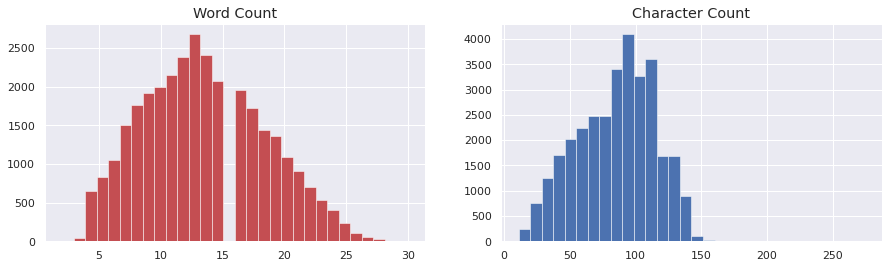

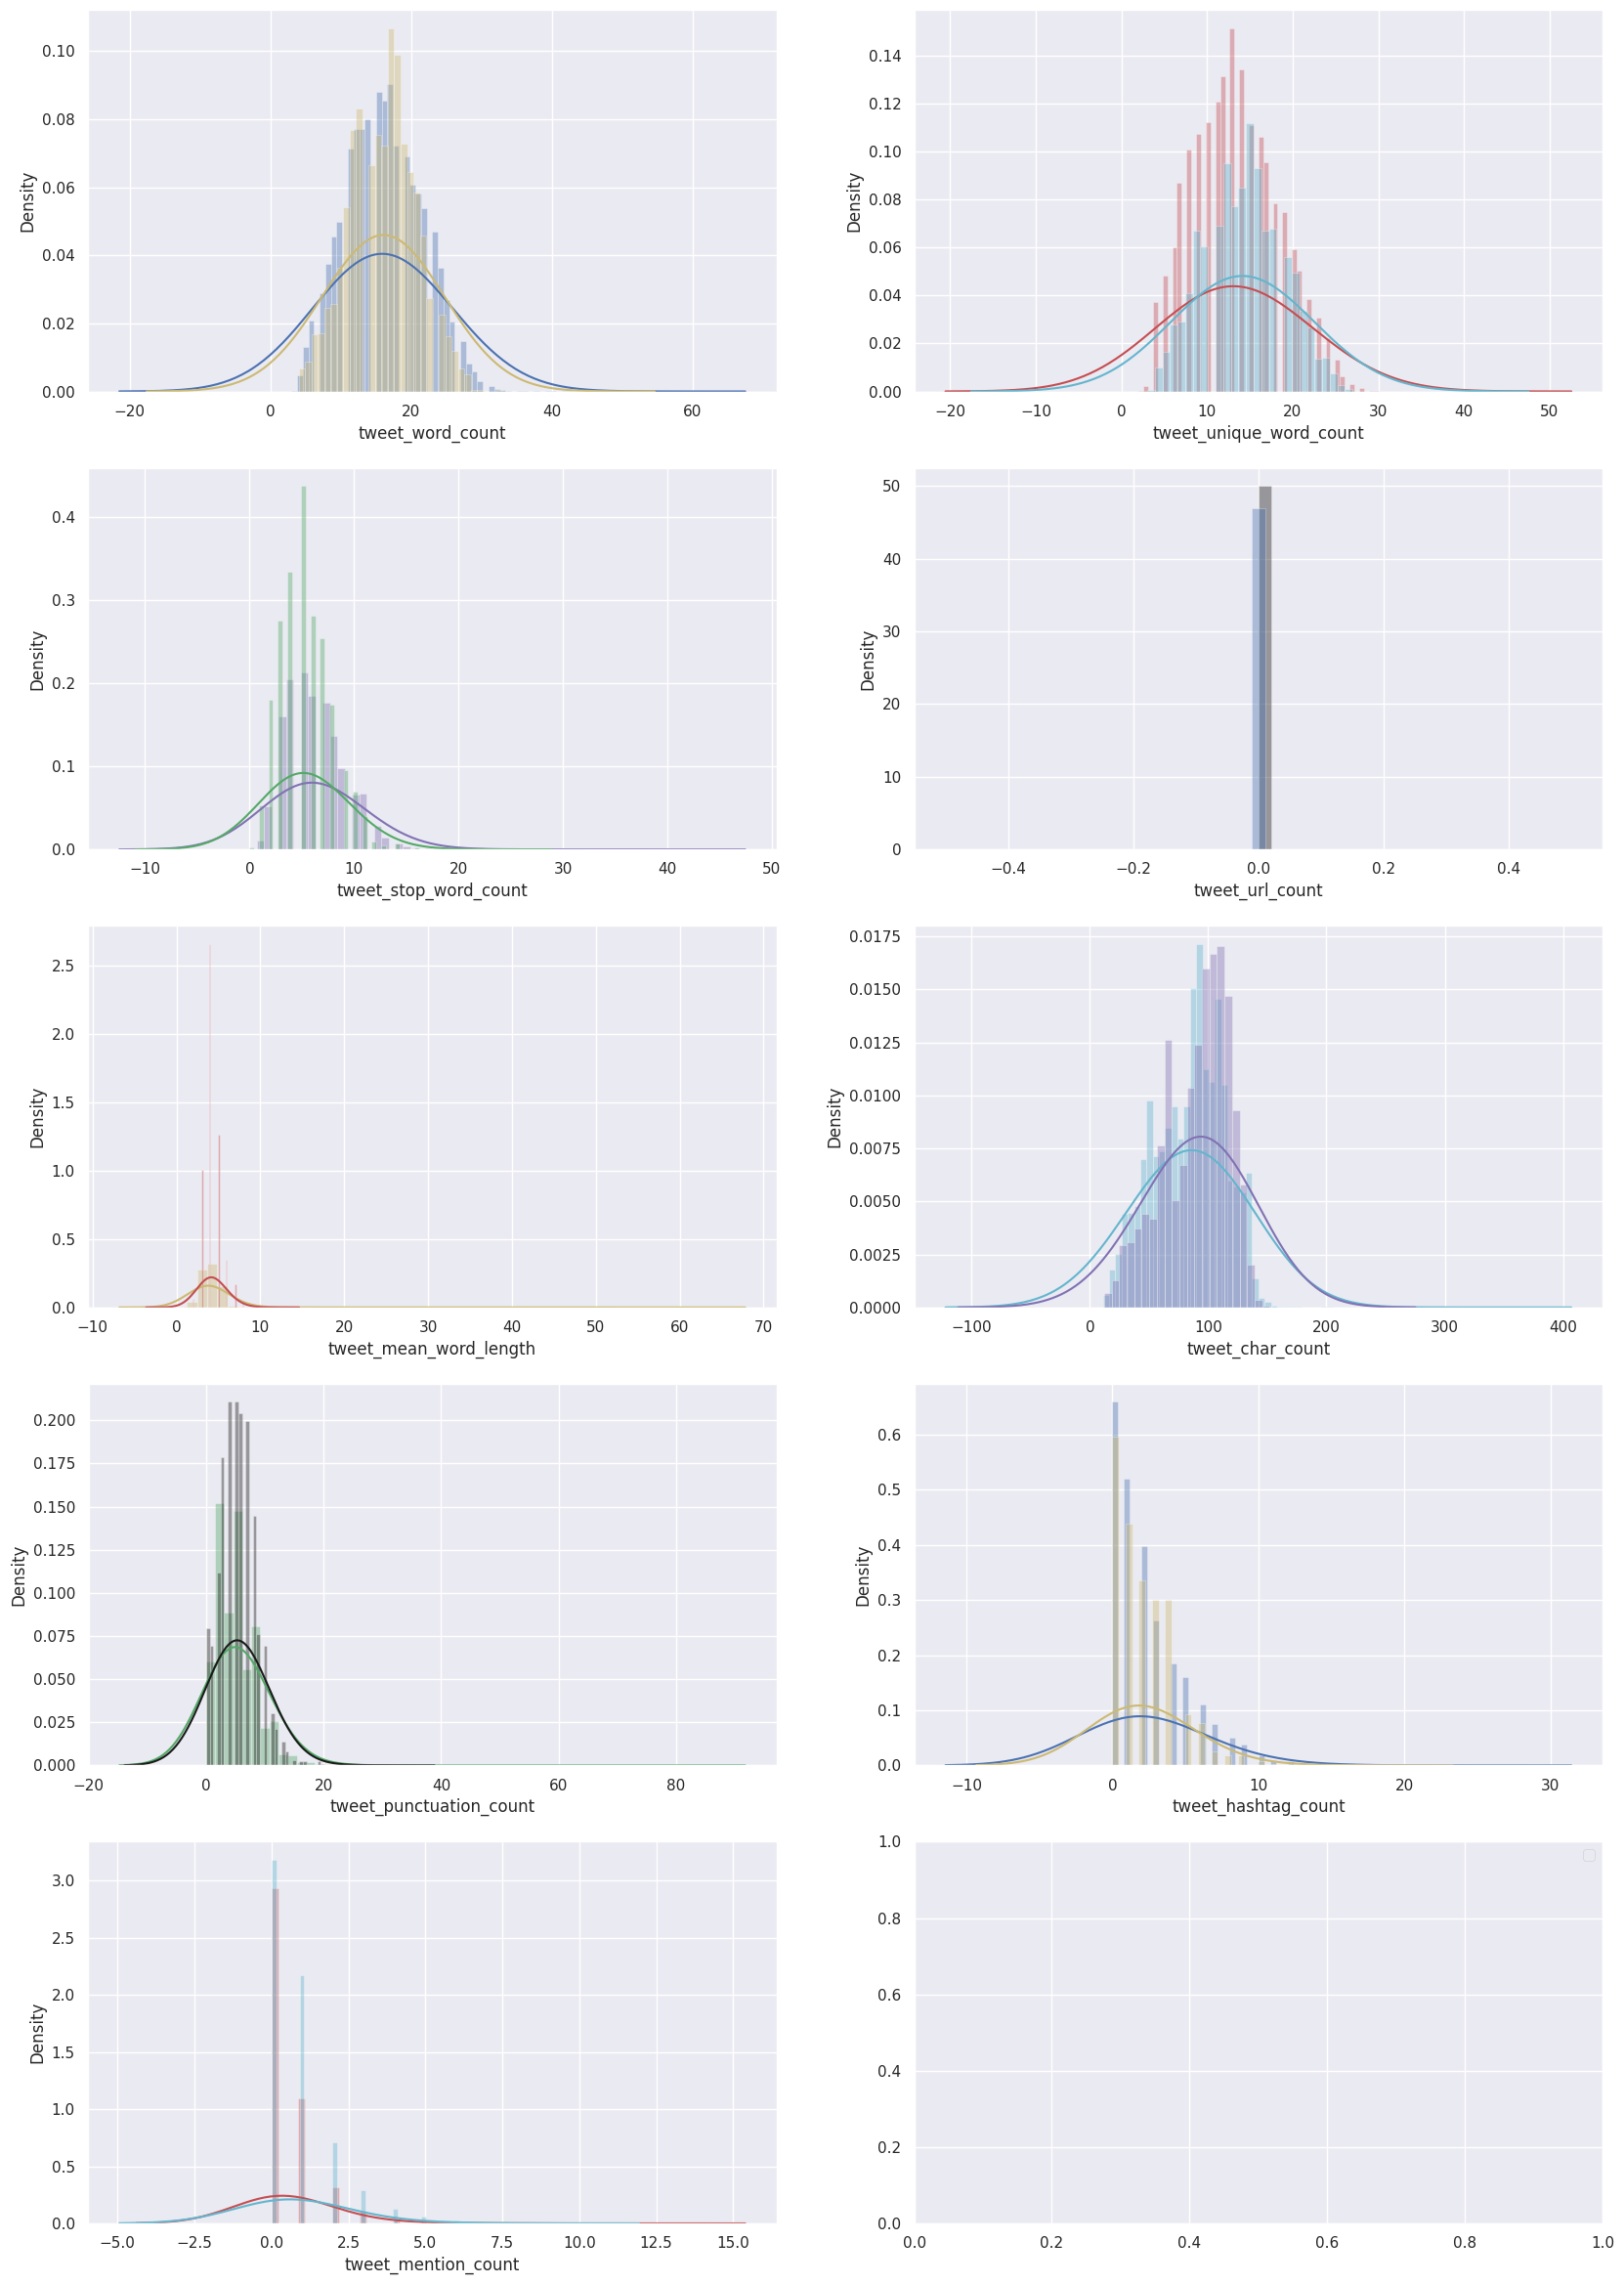

    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for tweet column
    Faster text processing using clean_text function, since top_num_features is below 300
    Time Taken for Expanding emojis and abbreviations in data = 1 seconds
        Time Taken for Processing text in data = 65 seconds
Train data Text cleaning completed. Time taken = 77 seconds

For target = label

    For class = 0
Top 200 n-grams
: ['user', 'day', 'love', 'do', 'not', 'happy', 'me', 'positive', 'time', 'your', 'will', 'we', 'go', 'today', 'make', 'life', 'when', 'bihday', 'good', 'now', 'what', 'take', 'see', 'but', 'thankful', 'like', 'smile', 'new', 'father', 'people', 'cannot', 'our', 'wait', 'look', 'healthy', 'ur', 'come', 'how', 'want', 'work', 'no', 'affirmation', 'weekend', 'i_am', 'model', 'friday', 'week', 'summer', 'they', 'beautiful', 'best', 'family', 'fun', 'think', 'tomorrow', 'morning', 'feel', 'there', 'girl', 'who', 'watch', 'here', 'way', 'gr

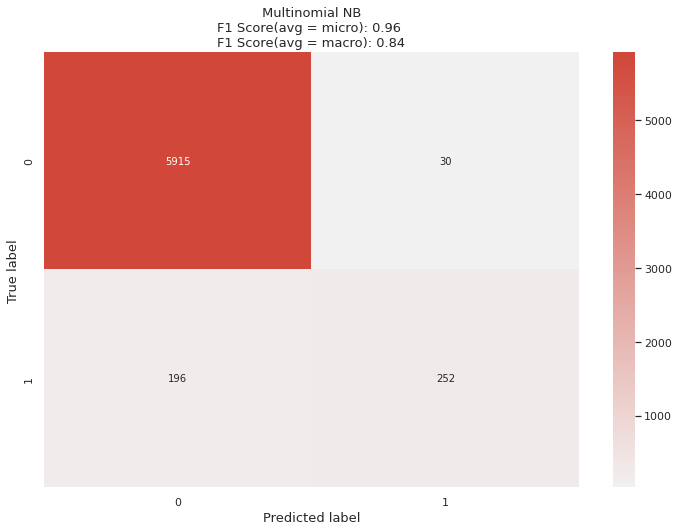

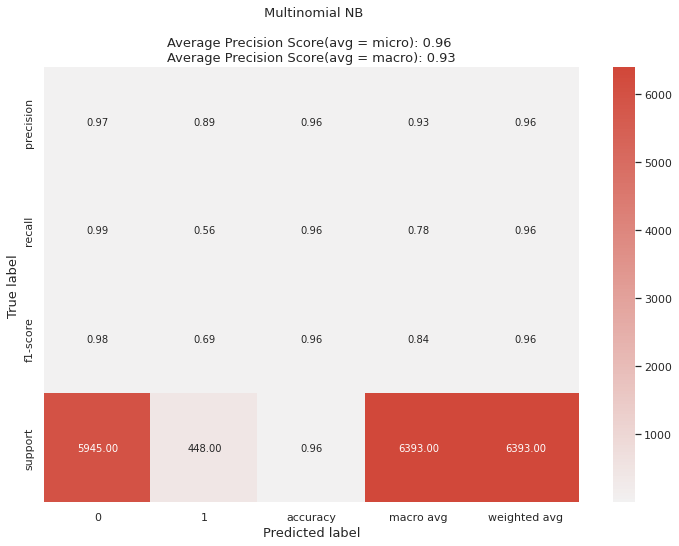

  Now transforming Train data to return as output...
    Time Taken for Expanding emojis and abbreviations in data = 1 seconds
        Time Taken for Processing text in data = 49 seconds
  Transforming Test data to return as output...
    Time Taken for Expanding emojis and abbreviations in data = 1 seconds
        Time Taken for Processing text in data = 34 seconds
Training best Auto_NLP Pipeline on full Train data...will be faster since best params are known
    Time Taken for Expanding emojis and abbreviations in data = 1 seconds
        Time Taken for Processing text in data = 48 seconds
    Returning best Auto_NLP pipeline to transform and make predictions on test data...
    Time Taken for Expanding emojis and abbreviations in data = 1 seconds
        Time Taken for Processing text in data = 33 seconds
Training completed. Time taken for Auto_NLP = 8.4 minutes
#########          A U T O   N L P  C O M P L E T E D    ###############################


In [45]:
from autoviml.Auto_ViML import Auto_NLP

train_x, test_x, final, predicted= Auto_NLP(input_feature, train, test,target,
                                            score_type="balanced_accuracy",
                                            top_num_features=350,
                                            modeltype="Classification",
                                            verbose=2,
                                            build_model=True)

## 5.0 Prediction

In [46]:
test['label']=final.predict(test[input_feature])

    Time Taken for Expanding emojis and abbreviations in data = 1 seconds
        Time Taken for Processing text in data = 33 seconds


In [47]:
test_predicted = test.copy()
test_predicted.to_csv('prediction.csv',index = False)